<a href="https://colab.research.google.com/github/Mohammed20f20375/AIDL-20f20375/blob/main/Copy_of_X_ray_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive/


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train'  # path of train folder for both classes x-ray and non x-ray
test_dir = '/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test'    #  path of test folder for both classes x-ray and non x-ray

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test/non_xray')))

565
621
565
551


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (x-ray vs. non x-ray)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 949 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
#binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 219s 6s/step - accuracy: 0.7560 - loss: 0.4938 - val_accuracy: 0.8729 - val_loss: 0.8595
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.9850 - loss: 0.0593 - val_accuracy: 0.9746 - val_loss: 0.1081
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 209s 6s/step - accuracy: 0.9737 - loss: 0.0804 - val_accuracy: 0.9661 - val_loss: 0.1988
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 1.0000 - loss: 9.6378e-04 - val_accuracy: 0.9788 - val_loss: 0.2145
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 1.0000 - loss: 9.8546e-05 - val_accuracy: 0.9831 - val_loss: 0.1759
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 1.0000 - loss: 1.3346e-05 - val_accuracy: 0.9831 - val_loss: 0.1843
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 1.0000 - loss: 1.0235e-05 - val_accuracy: 0.9831 - val_loss: 0.1846
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 1.0000 - loss: 1.0608e-05 - val_accuracy: 0

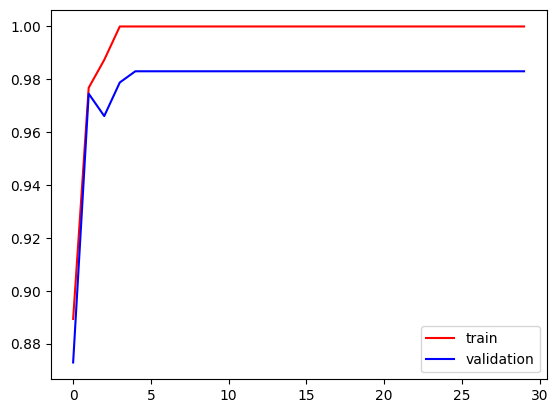

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

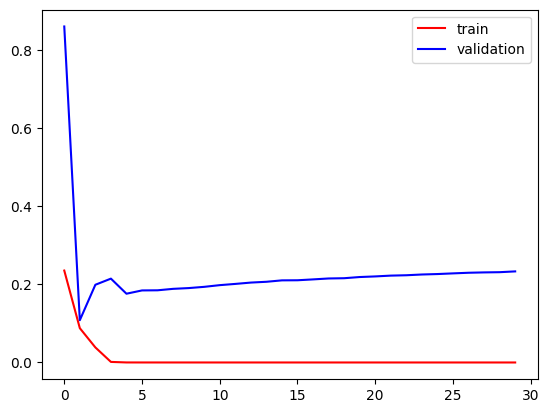

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1115 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

35/35 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step
[[0.0000000e+00]
 [0.0000000e+00]
 [2.0667654e-33]
 ...
 [0.0000000e+00]
 [3.1399528e-36]
 [0.0000000e+00]]


In [ ]:
len(predictions)

437

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[275 276]
 [272 292]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       551
           1       0.51      0.52      0.52       564

    accuracy                           0.51      1115
   macro avg       0.51      0.51      0.51      1115
weighted avg       0.51      0.51      0.51      1115



In [ ]:
# Pre-trained CNN

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive/


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train'  # path of train folder for both classes x-ray and non x-ray
test_dir = '/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test'    # path of test folder for both classes x-ray and non x-ray

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/Xray_Classifier/test/non_xray')))

565
621
565
551


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (x-ray vs. non x-ray)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 949 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 456s 13s/step - accuracy: 0.4672 - loss: 4.3981 - val_accuracy: 0.5381 - val_loss: 1.0702
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 362s 10s/step - accuracy: 0.6189 - loss: 0.7505 - val_accuracy: 0.6737 - val_loss: 0.6405
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 314s 10s/step - accuracy: 0.8740 - loss: 0.3535 - val_accuracy: 0.7966 - val_loss: 0.4434


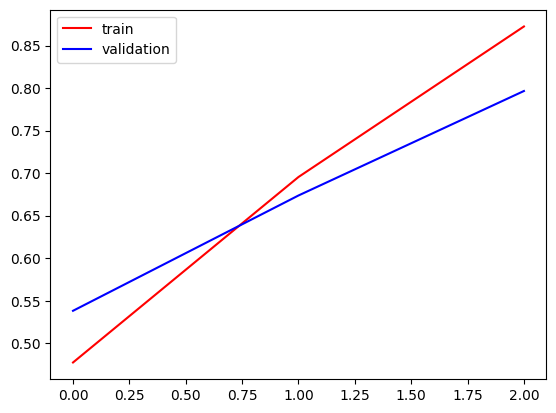

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

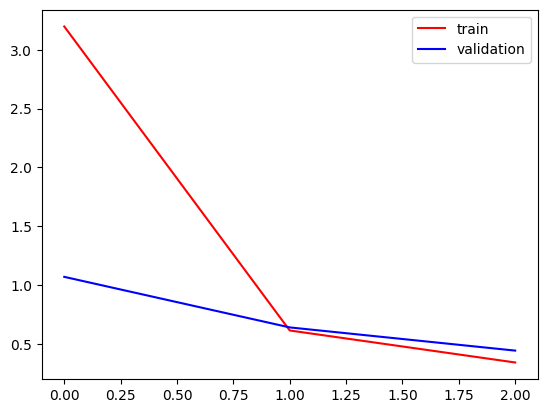

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1115 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

35/35 ━━━━━━━━━━━━━━━━━━━━ 323s 9s/step
[[0.96494305]
 [0.02014273]
 [0.03061537]
 ...
 [0.50986224]
 [0.81646544]
 [0.52145106]]


In [ ]:
len(predictions)

1115

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[256 295]
 [277 287]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       551
           1       0.49      0.51      0.50       564

    accuracy                           0.49      1115
   macro avg       0.49      0.49      0.49      1115
weighted avg       0.49      0.49      0.49      1115

